# 전처리 종합실습 ②

#### 목표
주가를 예측하는 모델링을 수행하고자 할때,  
모델링에 적합한 형태로 데이터를 만들어 봅시다.

## 데이터 준비

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
stock = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/KT.csv'
                 , sep=',', skipinitialspace=True)  
stock.Date = pd.to_datetime(stock.Date)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200


## 문제 1. 데이터 살펴보기

1-1) 받은 데이터는 몇일부터 몇일까지의 주가 데이터인가요?

In [39]:
print(min(stock.Date), max(stock.Date))

2014-09-09 00:00:00 2019-09-09 00:00:00


In [42]:
print(stock.Date.min())

2014-09-09 00:00:00


1-2) 기간 중 최고가와 최저가, 평균 주가는 얼마인가요?

In [4]:
print(stock.Close.max(), stock.Close.min(), stock.Close.mean() )

18.6 10.97 14.06943605718823


1-3) 연도별 최저, 최고, 평균 주가를 조회하시오.

In [23]:
stock['Year'] = stock['Date'].dt.year

In [6]:
stock.groupby(by = 'Year', as_index = True)['Close'].agg(['max','min','mean'])

,max,min,mean
Year,,,
2014,17.459999,14.05,15.293250
2015,14.850000,11.83,13.113095
2016,16.730000,11.03,14.140794
2017,18.600000,13.84,15.735578
2018,16.010000,12.75,13.973426
2019,14.670000,10.97,12.514566


1-4) 종가(Close)를 라인차트로 그려봅시다.

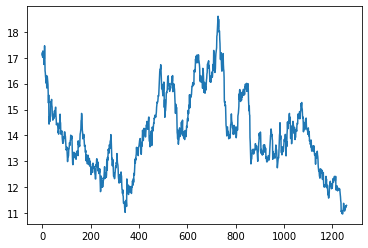

In [7]:
stock.Close.plot()
plt.show()

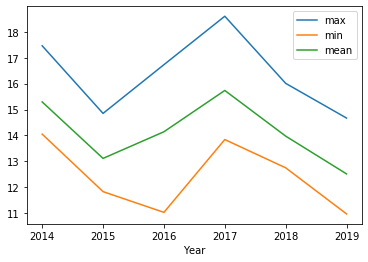

In [8]:
stock.groupby(by = 'Year', as_index = True)['Close'].agg(['max','min','mean']).plot()
plt.show()

## 문제 2. 데이터 셋 구성하기

종가를 기준으로 익일 종가를 예측하는 모델을 만들고자 합니다.
데이터프레임은 어떻게 구성되어야 할까요?

2-1) 전일 종가 변수를 추가하시오.

In [24]:
stock['Close_lag1'] = stock['Close'].shift()

In [4]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag1
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,NaN
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,17.110001
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,17.200001
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,17.020000
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,17.260000


2-2) 전전일 종가대비 전일 종가 등락폭 변수

In [25]:
stock['Close_diff'] = stock['Close_lag1'] - stock['Close'].shift(2)

In [6]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag1,Close_diff
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,NaN,NaN
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,17.110001,NaN
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,17.200001,0.090000
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,17.020000,-0.180001
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,17.260000,0.240000


2-3) 전일 고가대비 저가 등락폭 변수

In [26]:
stock['Diff_lag1'] = stock['High'].shift() - stock['Low'].shift()

In [8]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag1,Close_diff,Diff_lag1
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,NaN,NaN,NaN
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,17.110001,NaN,0.170000
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,17.200001,0.090000,0.240002
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,17.020000,-0.180001,0.110001
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,17.260000,0.240000,0.090000


2-4) 7일 이동평균종가

In [27]:
stock['Close_MA7_Lag1'] = stock['Close'].rolling(7,min_periods=1).mean().shift()

In [10]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag1,Close_diff,Diff_lag1,Close_MA7_Lag1
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,NaN,NaN,NaN,NaN
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,17.110001,NaN,0.170000,17.110001
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,17.200001,0.090000,0.240002,17.155001
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,17.020000,-0.180001,0.110001,17.110001
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,17.260000,0.240000,0.090000,17.147500


2-5) 요일 변수

In [28]:
stock['WeekDays'] = stock['Date'].dt.dayofweek

In [29]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Close_lag1,Close_diff,Diff_lag1,Close_MA7_Lag1,WeekDays
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,2014,NaN,NaN,NaN,NaN,1
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,2014,17.110001,NaN,0.170000,17.110001,2
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,2014,17.200001,0.090000,0.240002,17.155001,3
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,2014,17.020000,-0.180001,0.110001,17.110001,4
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,2014,17.260000,0.240000,0.090000,17.147500,0


위에서 만든 변수 이외에 추가로 5개 이상을 더 만드시오.

In [ ]:
d

## 문제 3. 모델링을 위한 전처리

* dummy variable로 변환하시오

In [30]:
# 범주형(명목형) 변수를 가변수로 만들고 붙여봅시다.
dummy_fields = ['WeekDays']
for each in dummy_fields:
    dummies = pd.get_dummies(stock[each], prefix=each, drop_first=False)
    stock = pd.concat([stock, dummies], axis=1)

stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Close_lag1,Close_diff,Diff_lag1,Close_MA7_Lag1,WeekDays,WeekDays_0,WeekDays_1,WeekDays_2,WeekDays_3,WeekDays_4
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,2014,NaN,NaN,NaN,NaN,1,0,1,0,0,0
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,2014,17.110001,NaN,0.170000,17.110001,2,0,0,1,0,0
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,2014,17.200001,0.090000,0.240002,17.155001,3,0,0,0,1,0
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,2014,17.020000,-0.180001,0.110001,17.110001,4,0,0,0,0,1
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,2014,17.260000,0.240000,0.090000,17.147500,0,1,0,0,0,0


In [31]:
# 불필요한 변수들 제거 : 가변수화 하기 전 변수, id, 일련번호 등.
fields_to_drop = ['Date','Open', 'High','Low','Volume','Year','Adj Close', 'WeekDays']
stock = stock.drop(fields_to_drop, axis=1)
stock.head()

,Close,Close_lag1,Close_diff,Diff_lag1,Close_MA7_Lag1,WeekDays_0,WeekDays_1,WeekDays_2,WeekDays_3,WeekDays_4
0,17.110001,NaN,NaN,NaN,NaN,0,1,0,0,0
1,17.200001,17.110001,NaN,0.170000,17.110001,0,0,1,0,0
2,17.020000,17.200001,0.090000,0.240002,17.155001,0,0,0,1,0
3,17.260000,17.020000,-0.180001,0.110001,17.110001,0,0,0,0,1
4,17.200001,17.260000,0.240000,0.090000,17.147500,1,0,0,0,0


In [32]:
stock.dropna(inplace = True)
stock.head()

,Close,Close_lag1,Close_diff,Diff_lag1,Close_MA7_Lag1,WeekDays_0,WeekDays_1,WeekDays_2,WeekDays_3,WeekDays_4
2,17.020000,17.200001,0.090000,0.240002,17.155001,0,0,0,1,0
3,17.260000,17.020000,-0.180001,0.110001,17.110001,0,0,0,0,1
4,17.200001,17.260000,0.240000,0.090000,17.147500,1,0,0,0,0
5,17.139999,17.200001,-0.059999,0.120001,17.158001,0,1,0,0,0
6,17.080000,17.139999,-0.060002,0.170000,17.155000,0,0,1,0,0


**이하 코드는 이해가 안가면 일단 그냥 실행을 합시다**

In [33]:
# asplit

train_features = stock.iloc[:1200, 1: ]
test_features = stock.iloc[1200:, 1: ]

train_target = stock.iloc[:1200, :1 ]
test_target = stock.iloc[1200:, :1 ]

train_target, test_target = train_target.values, test_target.values

* Scaling

In [34]:
# 필요한 함수 로딩
from sklearn.preprocessing import MinMaxScaler

# 선언하기
minmax = MinMaxScaler()

# train 데이터로 .fit ==> 모든변수의 min, max, 공식 도출.
# 말하자면, scaling 하는 모델을 만드는 것!
minmax.fit(train_features) # train min, max

# 위 scaling 공식으로 적용하기(변환하기)
train_features_sc = minmax.transform(train_features)
test_features_sc = minmax.transform(test_features)

## 문제 4. 모델링

아래 코드는 머신러닝 과정에서 배웁니다.  
무작정 실행하고 결과를 확인하는 용도로만 사용합시다.

Mean Absolute Percentage Error : 0.03090


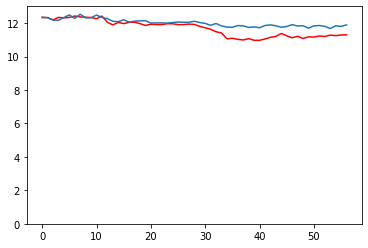

In [35]:
# Nearest-Neighbor Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 모델 준비
knn_reg = KNeighborsRegressor(n_neighbors=10)

# 모델 training
# Test셋의 첫번째 컬럼(cnt)만 사용할 것이다. 
knn_reg.fit(train_features_sc , train_target  )

# Training & Validation set에서의 예측값 준비
test_pred = knn_reg.predict(test_features_sc)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

# 성능 확인
print("Mean Absolute Percentage Error : {0:.5f}".format(mean_absolute_percentage_error(test_target, test_pred) ))

plt.plot(test_target, color = 'r')
plt.plot(test_pred)
plt.ylim(0,13)
plt.show()

성능을 더 높이기 위해서 무엇을 더 해볼 수 있을까요?  
어떤 변수를 더 추가하면 성능향상에 도움이 될까요?